# Pandas y Valores Faltandes




## Extra: Tripulación del Titanic

Si llegaste hasta acá y todavía tenés tiempo y ganas, te proponemos que explores el dataset de Supervivientes del Titanic. Queremos saber si los sobrevivientes del RMS Titanic murieron *al azar* o si los sobrevivientes tenían alguna característica distinta de las víctimas de la tragedia. Tenemos disponibles algunos datos sobre pasajeros/as del Titanic, que pueden descargar [acá](https://www.kaggle.com/c/titanic/) (solo el archivo `train.csv`). La propuesta es analizarlos para intentar encontrar algunas características que separen a los/as pasajeros/as que sobrevivieron de los/as que no.

### Análisis Exploratorio de Datos

1. Cargar los datos desde el archivo csv.
1. Investigar qué forma tienen los datos utilizando las funciones exploratorias que aprendimos. ¿Qué información tenemos en los datos?¿Qué representa cada columna?¿Cuántos pasajeros/as están incluidos/as en este Dataset?
1. ¿Faltan datos? ¿Se te ocurre por qué? ¿Qué harías con ellos?
1. ¿Te parece que todas las columnas son informativas o borrarías alguna?

**Para pensar**: ¿te parece que la supervivencia (o no) fue un proceso completamente *al azar* o existe algún mecanismo generador de estos datos?¿Qué nos enseñó la famosa película de David Cameron?

https://medium.com/@diolmedo/participando-en-la-competencia-titanic-machine-learning-from-disaster-en-la-plataforma-kaggle-47f01c838af2

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
titanic = pd.read_csv('Titanic.csv',delimiter = ',',encoding = "utf-8")
titanic.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
titanic.shape

(891, 12)

2. ¿Cuántas columnas (features) tiene?¿Cuáles son sus nombres?¿Y cuántas filas (instancias)?.

In [24]:

print(titanic.shape)
print(titanic.columns)
# wine_reviews.drop(columns=['Unnamed: 0'], inplace = True)
# titanic.drop(columns=['Parch'], inplace = False)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


3. ¿Cuántos valores faltantes hay en cada columna?

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
print(titanic.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
nulos = titanic.shape[0]-titanic.count()
nulos

4. ¿Cuál o cuáles son las columnas con más valores faltantes?

In [ ]:
registro_5 = titanic.iloc[5]
print(registro_5)


In [10]:
titanic.isna().sum(axis = 0).idxmax()

'Cabin'

In [ ]:
titanic.isna().sum(axis = 1).idxmax()

In [ ]:
titanic.iloc[titanic.isna().sum(axis = 1).idxmax()]

5. Hacerse alguna pregunta acerca del dataset e intentar responderla. Por ejemplo, ¿cuál es la persona de más edad?

In [11]:
titanic.Age.idxmax()

630

In [ ]:
titanic["Age"].idxmax()

In [12]:
titanic.loc[titanic.Age.idxmax()]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                            80.0
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                           30.0
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

In [ ]:
titanic.loc[titanic.Age.idxmax()]['Name'] 

In [ ]:
titanic.loc[titanic.Age.idxmax(),['Name',"Embarked"] ]

In [15]:
titanic.loc[titanic.Age.idxmin()]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

In [ ]:
titanic.loc[titanic.Age.idxmin()]['Name']

## Trabajando con datos faltantes

Antes de realizar cada una de las siguientes consignas, recordá copiar el dataset en una nueva variable, así mantemos el dataset original sin modificar.

1. Descartar aquellas filas que tengan algún valor faltante. ¿Cuántas instancias quedan en el dataset?

In [ ]:
titanic_copia = titanic.copy()

In [ ]:
titanic.shape

In [ ]:
titanic_copia.dropna(inplace = True)
titanic_copia.shape

2. Descartar aquellas columnas que tengan algún valor faltante. ¿Cuántos y cuáles atributos quedaron?

In [ ]:
titanic_copia = titanic.copy()

In [ ]:
titanic_copia.shape

In [ ]:
titanic_copia.dropna(axis = 1, inplace = True)
titanic_copia.shape

In [ ]:
print(titanic_copia.columns)
print(titanic.columns)

In [ ]:
titanic_copia.head()

Pueden observar que descartar sin ningún criterio puede hacer que perdamos muchos datos.

Tratemos de mejorar un poco los criterios con los que descartamos.

3. Descartar aquellas filas que tengan más de tres valores faltantes. ¿Cuántas instancias quedaron?

In [ ]:
titanic_copia = titanic.copy()

In [ ]:
titanic_copia.shape

In [ ]:
titanic_copia.dropna(inplace = True, thresh=1)
titanic_copia.shape

4. Descartar aquellas columnas que tengan más del 50% de valores faltantes. ¿Cuántos y cuáles atributos quedaron? Luego, descartar las instancias que tengan algún valor faltante.

In [ ]:
titanic_copia = titanic.copy()

In [ ]:
titanic_copia.dropna(axis = 1, inplace = True, thresh=titanic_copia.shape[0]*0.5)
titanic_copia.shape

In [ ]:
titanic_copia.dropna(inplace = True)
titanic_copia.shape

In [ ]:
titanic_copia.head()

## Imputación de Valores Faltantes

1. Calcular el valor medio, moda, mediana y la desviación estándar de la columna `price`.

In [ ]:
titanic.describe()

In [ ]:
titanic["Age"].describe()


In [ ]:
print(titanic.Age.mean())
print(titanic.Age.mode()[0])
print(titanic.Age.median())
print(titanic.Age.std())

2. Imputar los valores faltantes en la columna `Age` usando su valor medio.

In [ ]:
titanic_copia = titanic.copy()
titanic_copia.fillna(titanic.Age.median(), inplace = True)

3. ¿Cambió el valor medio de la columna?¿Y su desviación estándar?¿Y los otros estadísticos que calculamos?¿Por qué?

In [ ]:
print(titanic_copia["Age"].describe())
print(titanic["Age"].describe())

In [ ]:
print(titanic_copia.Age.mean())
print(titanic_copia.Age.mode()[0])
print(titanic_copia.Age.median())
print(titanic_copia.Age.std())

4. Volver a correr las celdas anteriores, pero completando los valores faltantes con la mediana y luego la moda.

In [31]:
titanic_copia = titanic.copy()
titanic_copia.fillna(titanic.Age.mode()[0], inplace = True)

In [32]:
titanic_copia.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


5. Trabajar con un dataset sin visualizar es muy aburrido y, diríamos, casi frustrante. La próxima clase ya nos meteremos de lleno en visualización. Mientras tanto, intenten hacer un histograma de los puntajes asignados y, luego, de los precios.

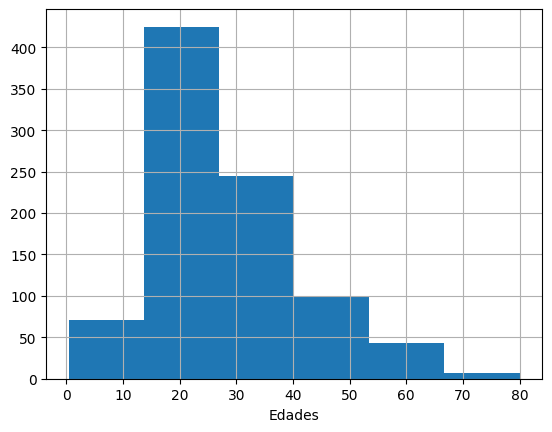

In [33]:
plt.hist(titanic_copia.Age, bins= 6)
plt.xlabel('Edades')
plt.grid()
plt.show()

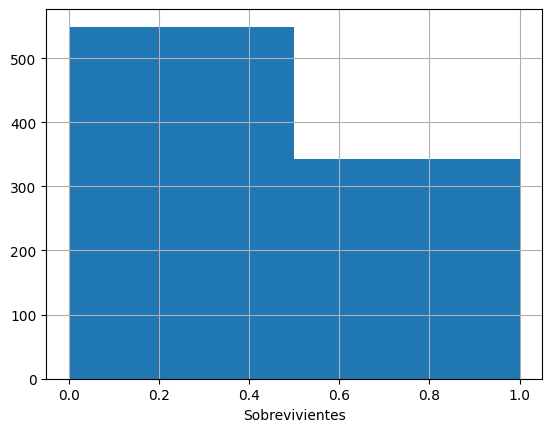

In [34]:
plt.hist(titanic_copia.Survived, bins= 2)#, log = True)
plt.xlabel('Sobrevivientes')
plt.grid()
plt.show()

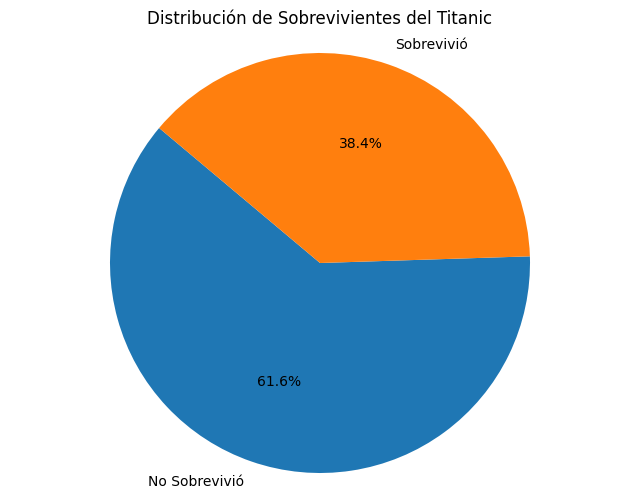

In [35]:
survived_counts = titanic_copia['Survived'].value_counts()

# Crear gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['No Sobrevivió', 'Sobrevivió'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Sobrevivientes del Titanic')
plt.axis('equal')  # Para asegurar que el gráfico de torta sea un círculo
plt.show()

Respecto al segundo gráfico, ¿les gusta cómo queda?¿Qué es una escala logarítmica?

In [ ]:
print(titanic[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Age','Survived']].groupby(['Age']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
titanic.info()

In [ ]:
titanic.fillna(titanic.Age.mean(), inplace = True)

In [ ]:
titanic['Rango_Edad'] = pd.cut(titanic['Age'], 5)

In [ ]:
titanic["Rango_Edad"]

In [ ]:
print(titanic[['Rango_Edad','Survived']].groupby(['Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Cabin','Survived']].groupby(['Cabin']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
titanic.fillna(titanic.Embarked.mode(), inplace = True)

In [ ]:
print(titanic[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Parch','Survived']].groupby(['Parch']).count().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Sex','Pclass','Survived']].groupby(['Sex','Pclass']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Sex','Rango_Edad','Survived']].groupby(['Sex','Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Pclass','Rango_Edad','Survived']].groupby(['Pclass','Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Sex','Pclass','Rango_Edad','Survived']].groupby(['Sex','Pclass','Rango_Edad']).mean().sort_values(by='Survived', ascending=False))

In [ ]:
print(titanic[['Sex','Pclass','Rango_Edad','Survived']].groupby(['Sex','Pclass','Rango_Edad']).count().sort_values(by='Survived', ascending=False))